In [ ]:
!pip install catboost

# **Libiriraies**

In [ ]:
#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
#from catboost import CatBoostRegressor

#Data Manipulation
import pandas as pd
import numpy as np

#Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

#Model Evaluation
from sklearn.metrics import mean_squared_error

#Feature Selection
import statsmodels.api as sm

#Feature Scaling/Transformation
from sklearn.preprocessing import PowerTransformer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Exploration**

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rent It ! [PR22] Competition/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rent It ! [PR22] Competition/test.csv")

train.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# **Short Description Of The Features**

Date ==> The Date ranges between 2017-2018

Rented Bike Count ==> The number of rented bikes (Class Label)

Hour ==> day time 

Temperature(°C) ==> Temparture Degree in celcius

Humidity(%) ==> Prentage of humidity

Wind speed (m/s) ==> Wind speed (The values approximalty ranges between [0-5])

Visibility (10m) ==> means that a person should be able to see and identify in the daytime (value 2000 means the Visibility of the day is clear. The Visibility decrease by decreasing the this value)

Dew point temperature(°C) ==> The dew point is the temperature the air needs to be cooled to

Solar Radiation (MJ/m2) ==> electromagnetic radiation emitted by the sun

Rainfall(mm) ==> Rainfall

Snowfall (cm) ==> Snowfall

Seasons	==> (Winter, Summer, Spring) Autumn season is missing should be add it in the data

Holiday	==> If the day is public vacation or not

Functioning Day ==> Neither the day is working day or weekend

# **Check Null Values**

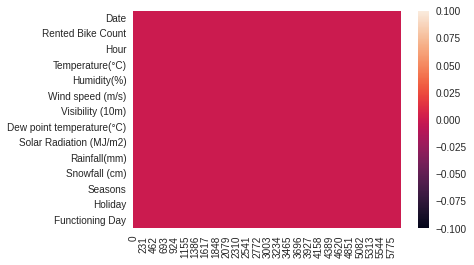

In [ ]:
sns.heatmap(train.isnull().T)

#There are no Null Values

# **Check Duplictes**

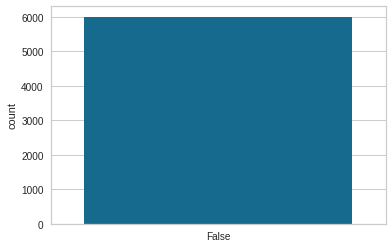

In [ ]:
dup = train.duplicated()
sns.countplot(dup)

#There are no Duplications

# **Iditify the Correlation between features**

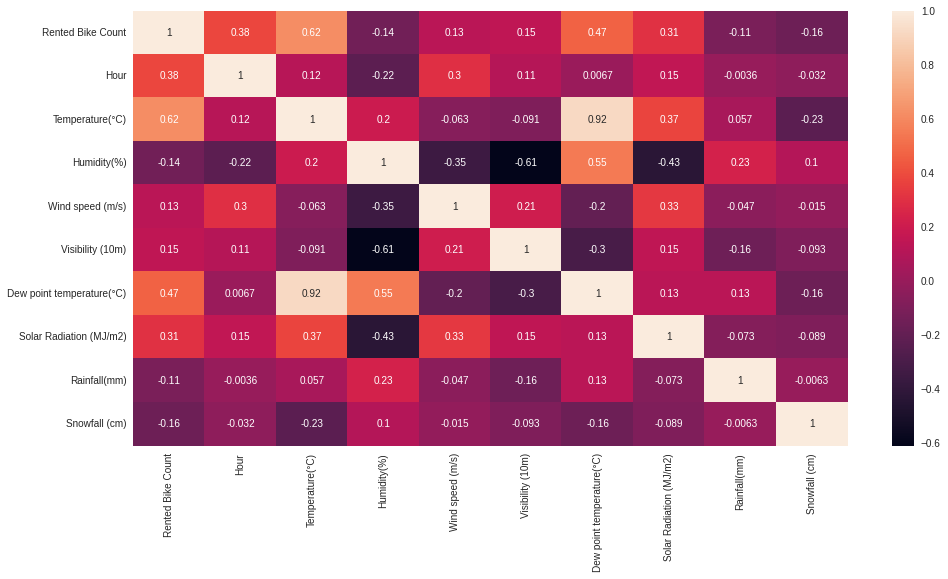

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(data=train.corr(),annot=True, ax = ax)

**Correlation Matrix Explaination**

- There is a strong correlation between Temprature and De point Tepmrature and Solar Radiation as we would expected

- The rented Bike count is directly affected with Hour. I think the people would rent a bike in the time that before and after the work 

- The rented Bike count have strong correlation with Temprature and Dew Point Temparture and Solar Radiation. When The Day is sunny, the emission of electro magnetic waves increase so the propabilty of people to rent a bike increase as they need cooling there bodies.

- Rented Bike Count have inverse Correlation with Rainfall and Snowfall, this is a week correlation but it is make sense when the day is rainy or have snowfall the people would prefere to stay at home

- The Temprature have week correlation with Windspeed. Sometimes when the day is windy the temprature decrease so it make sense
 
- Humidity have strong inverse correlation with Visibility as we would expected, When the humidity increase the the visibility become harder

- humidity is inversely related to Rented Bike Count as expected as the people won't rent a bike in humid days and also the visibilty in these days is harder

# **Visualization of Categorical Varaibles**

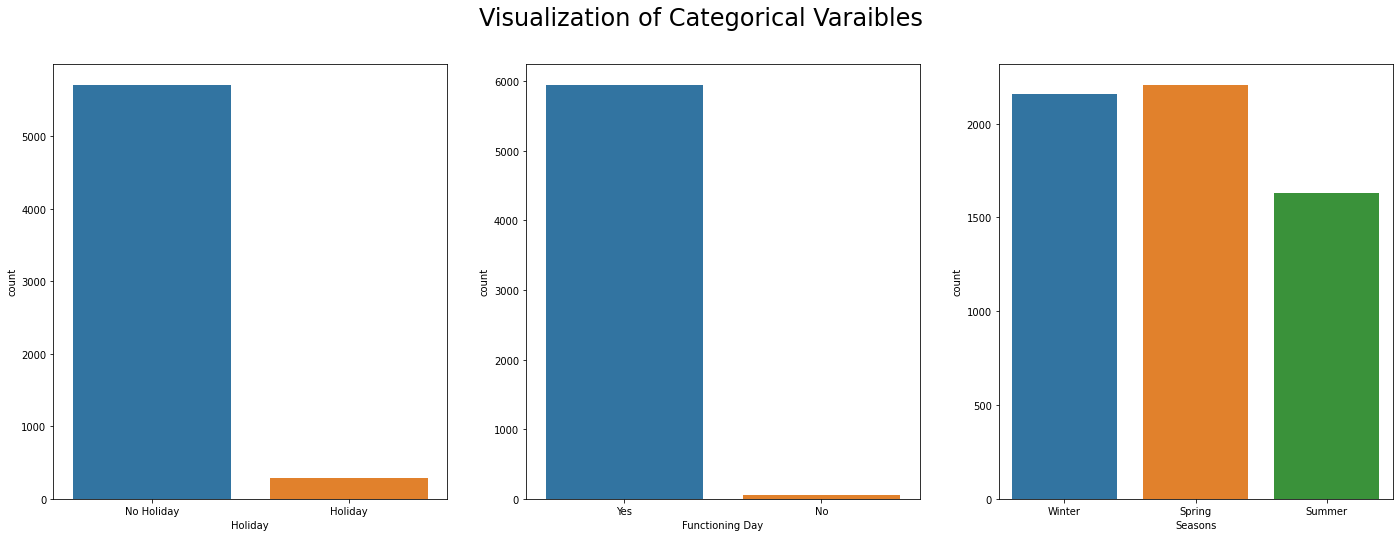

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(24,8))
fig.suptitle('Visualization of Categorical Varaibles', fontsize = 24)

sns.countplot(ax = ax[0], x = 'Holiday', data = train)
sns.countplot(ax = ax[1], x = 'Functioning Day', data = train) 
sns.countplot(ax = ax[2], x = 'Seasons', data = train)

- as we see in Holiday, the majority of Holiday is on non holiday days.

- in Functioning day coulmn, the majority Functioning day is on Functional Day.

- Autumn season is missing

**This data is unrealstic specially Functioning day as We at least have non functioning day at the holidays and both Friday and saturday while the count of non functioning day is less than the count of holidayes so it does not make sense**

# **Visualization Of Continous Variables**

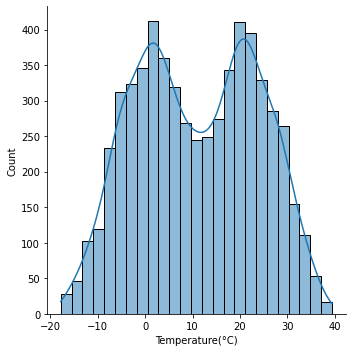

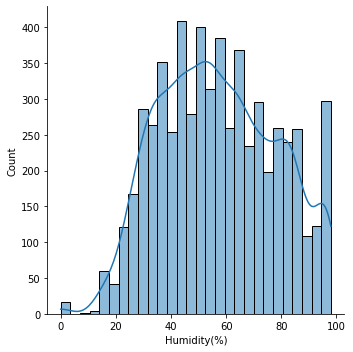

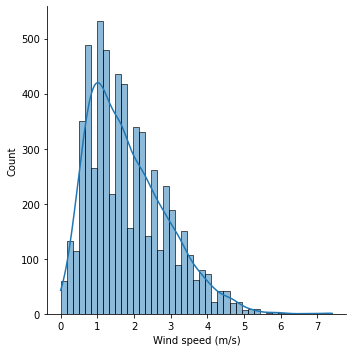

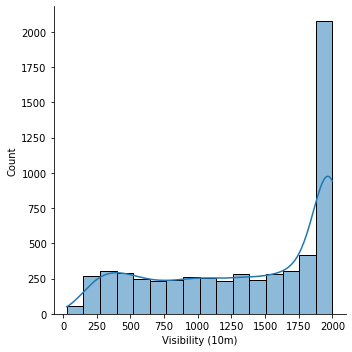

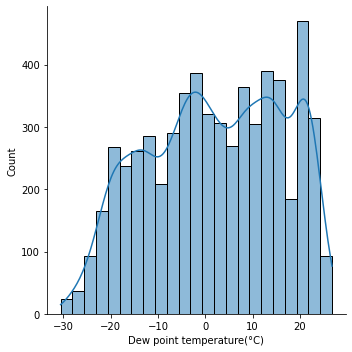

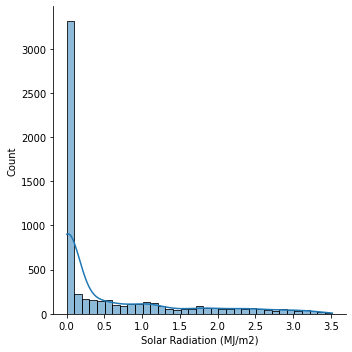

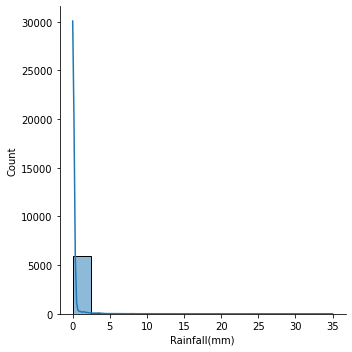

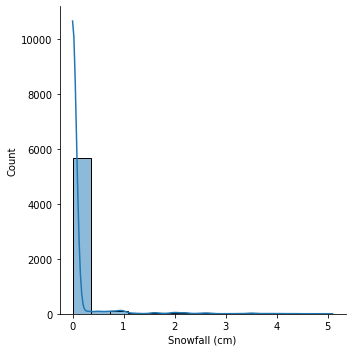

In [ ]:
colName = ['Temperature(°C)', 'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)','Snowfall (cm)']
for col in colName:
  sns.displot(train[col], kde=True)

- Humidity is on warmer side

- The Visibility is clear most of the time

- Rainfall less than 5 mm

- Snowfall is in range between (0-1)cm in most cases

- Wind speed is not severe most of the time

# **Feature Engineering**

# **Split The Date**

In [ ]:
def DateTimeSplitting(data):
  data["Date"] = pd.to_datetime(data["Date"])

  data['year'] = data['Date'].dt.year
  data['month'] = data['Date'].dt.month
  data['dayofweek'] = data['Date'].dt.dayofweek
  #data['dayofmonth'] = data['Date'].dt.day
  #data['dayofyear'] = data['Date'].dt.dayofyear
  data['weekofyear'] = data['Date'].dt.weekofyear

  data['year'] = data['year'].map({2017:0, 2018:1})
  data = data.drop('Date', axis=1) # drop Date Column
  
  return data

# **Handeling Missing Seasons**

In [ ]:
def Handel_Seasons(data):
  data.loc[( data['month'].isin(list(range(1,3))) ) | ( data['month'] == 12 ), 'Seasons'] = 'Winter'
  data.loc[data['month'].isin(list(range(3,6))) , 'Seasons'] = 'Spring'
  data.loc[data['month'].isin(list(range(6, 9))) , 'Seasons'] = 'Summer'
  data.loc[data['month'].isin(list(range(9, 12))) , 'Seasons'] = 'Autumn'

  return data

# **Reset Functioning Day**

In [ ]:
def Rest_FuntioningDay(data):
  data['Functioning Day'] = 'Yes'
  data.loc[(data['Holiday'] == 'Holiday') | (data['dayofweek'] == 5) | (data['dayofweek'] == 6), 'Functioning Day'] = 'No'

  return data

# **Rest Holiday**

In [ ]:
def Rest_Holiday(data):
  data['Holiday'] = 'No Holiday' 
  data.loc[data["weekofyear"].isin( [17,21,30,39,43,51]) , 'Holiday'] = 'Holiday'

  return data

# **Add Fog**

In [ ]:
def Add_Fog(data):
    data.loc[(data["Temperature(°C)"] - data["Dew point temperature(°C)"]) < 2, 'Fog'] = 'Fog_Y'
    data.loc[(data["Temperature(°C)"] - data["Dew point temperature(°C)"]) >= 2, 'Fog'] = 'Fog_N'

    return data

# **Add Shift/Lag**

In [ ]:
def lag(data):
  cols = ['Temperature(°C)', 'Humidity(%)',
  'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
  'Solar Radiation (MJ/m2)']
  for i in cols:
    data[i + '_lag_1'] = data[i].shift(1)
    data[i + '_lag_2'] = data[i].shift(2)
    data[i + '_lag_3'] = data[i].shift(3)
    #data[i + '_lag_4'] = data[i].shift(4)
    #data[i + '_lag_5'] = data[i].shift(5)

    data[i + '_lag_-1'] = data[i].shift(-1)
    data[i + '_lag_-2'] = data[i].shift(-2)
    data[i + '_lag_-3'] = data[i].shift(-3)
    #data[i + '_lag_-4'] = data[i].shift(-4)
    #data[i + '_lag_-5'] = data[i].shift(-5)

    data = data.fillna(method = 'ffill')
    data = data.fillna(method = 'bfill')

  return data

# **Make One Hot Encoder for (Seasons, Holiday, Functioning Day)**

In [ ]:
def one_hot_encoder(data):
  season = pd.get_dummies(data["Seasons"], drop_first=True)
  holiday = pd.get_dummies(data["Holiday"], drop_first=True)
  Functioning_Day = pd.get_dummies(data["Functioning Day"], drop_first=True)
  Fog = pd.get_dummies(data["Fog"], drop_first=True)

  #We make "drop_first" to avoid dummy trap

  data = pd.concat([data, season, holiday, Functioning_Day, Fog], axis=1)
  data = data.drop(columns=["Seasons", "Holiday", "Functioning Day", "Fog"], axis=1)

  return data

# **Create Pipeline**

In [ ]:
def Pipeline(data, listof_preprocessing_tech):
  for tech in listof_preprocessing_tech:
    data = tech(data)

  return data

Training Set

In [ ]:
train = Pipeline(train, [DateTimeSplitting, Handel_Seasons, Rest_Holiday, Add_Fog, lag])

train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Dew point temperature(°C)_lag_3,Dew point temperature(°C)_lag_-1,Dew point temperature(°C)_lag_-2,Dew point temperature(°C)_lag_-3,Solar Radiation (MJ/m2)_lag_1,Solar Radiation (MJ/m2)_lag_2,Solar Radiation (MJ/m2)_lag_3,Solar Radiation (MJ/m2)_lag_-1,Solar Radiation (MJ/m2)_lag_-2,Solar Radiation (MJ/m2)_lag_-3
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,...,-17.6,-17.6,-17.7,-17.6,0.00,0.00,0.00,0.00,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,...,-17.6,-17.7,-17.6,-18.6,0.00,0.00,0.00,0.00,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,...,-17.6,-17.6,-18.6,-18.7,0.00,0.00,0.00,0.00,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,...,-17.6,-18.6,-18.7,-19.5,0.00,0.00,0.00,0.00,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,...,-17.6,-18.7,-19.5,-19.3,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1898,19,32.9,56,2.6,1944,22.9,0.40,0.0,0.0,...,21.6,23.4,23.9,24.8,1.00,1.69,1.84,0.02,0.0,0.0
5996,1836,20,31.1,64,2.7,1770,23.4,0.02,0.0,0.0,...,21.4,23.9,24.8,25.2,0.40,1.00,1.69,0.00,0.0,0.0
5997,1826,21,30.3,69,2.2,1834,23.9,0.00,0.0,0.0,...,22.6,24.8,25.2,25.2,0.02,0.40,1.00,0.00,0.0,0.0
5998,1664,22,29.8,75,1.4,1609,24.8,0.00,0.0,0.0,...,22.9,25.2,25.2,25.2,0.00,0.02,0.40,0.00,0.0,0.0


In [ ]:
train[train['Seasons'] == 'Autumn']['month']

,month,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m)
192,9,-3.5,48,0.9,1967
193,9,-4.1,49,0.6,2000
194,9,-4.7,50,0.7,1983
195,9,-4.3,47,0.6,1992
196,9,-4.3,49,0.7,2000
...,...,...,...,...,...
5347,11,28.2,72,1.6,1745
5348,11,27.7,76,1.8,1727
5349,11,27.3,78,1.2,1606
5350,11,27.1,79,1.2,1578


Testing set

In [ ]:
test = Pipeline(test, [DateTimeSplitting, Handel_Seasons, Rest_Holiday, Add_Fog, lag])

test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,ID,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Dew point temperature(°C)_lag_3,Dew point temperature(°C)_lag_-1,Dew point temperature(°C)_lag_-2,Dew point temperature(°C)_lag_-3,Solar Radiation (MJ/m2)_lag_1,Solar Radiation (MJ/m2)_lag_2,Solar Radiation (MJ/m2)_lag_3,Solar Radiation (MJ/m2)_lag_-1,Solar Radiation (MJ/m2)_lag_-2,Solar Radiation (MJ/m2)_lag_-3
0,0,0,29.1,77,2.1,1465,24.6,0.0,0.0,0.0,...,24.6,24.7,25.3,25.3,0.0,0.0,0.0,0.0,0.00,0.00
1,1,1,28.5,80,1.5,1306,24.7,0.0,0.0,0.0,...,24.6,25.3,25.3,25.2,0.0,0.0,0.0,0.0,0.00,0.00
2,2,2,28.3,84,2.1,1099,25.3,0.0,0.0,0.0,...,24.6,25.3,25.2,24.9,0.0,0.0,0.0,0.0,0.00,0.00
3,3,3,28.3,84,0.5,1006,25.3,0.0,0.0,0.0,...,24.6,25.2,24.9,24.6,0.0,0.0,0.0,0.0,0.00,0.01
4,4,4,28.0,85,1.0,1079,25.2,0.0,0.0,0.0,...,24.7,24.9,24.6,24.8,0.0,0.0,0.0,0.0,0.01,0.19


# **Visualization of Categorical Values after Preprocessing**

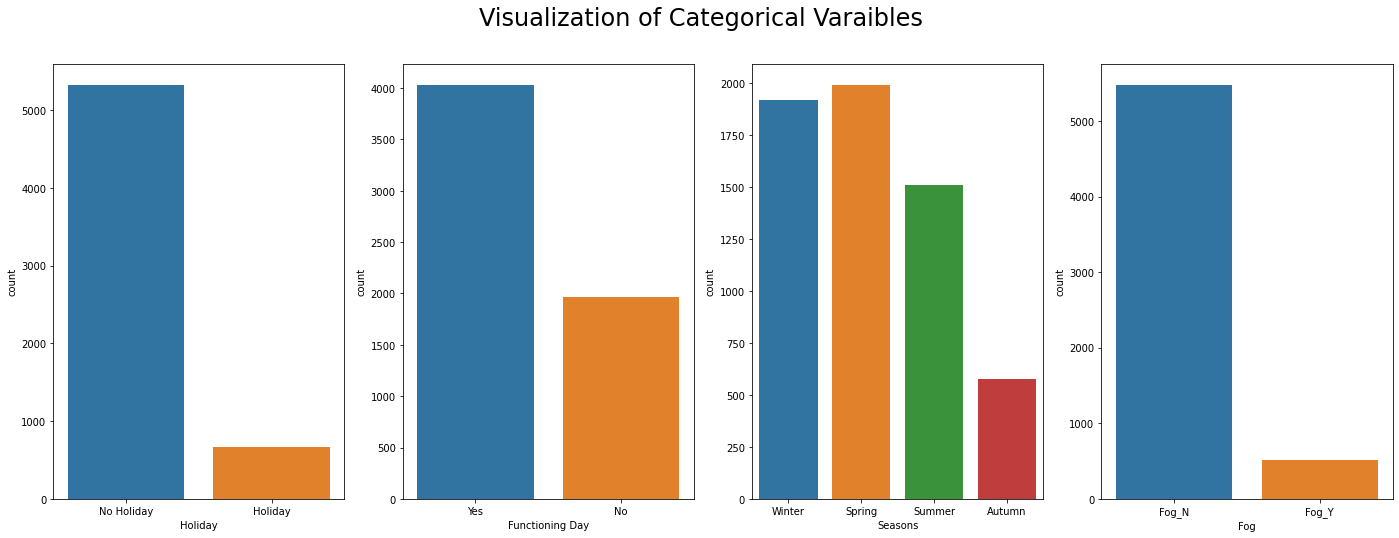

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(24,8))
fig.suptitle('Visualization of Categorical Varaibles', fontsize = 24)

sns.countplot(ax = ax[0], x = 'Holiday', data = train)
sns.countplot(ax = ax[1], x = 'Functioning Day', data = train) 
sns.countplot(ax = ax[2], x = 'Seasons', data = train)
sns.countplot(ax = ax[3], x = 'Fog', data = train)

- Now Holiday and Functioning day make sense

- Missing seasons are resolved

- The smaller the difference between the temperature and the dew point temperature, the higher the relative humidity (the closer the atmosphere is to a state in which water vapor would condense).

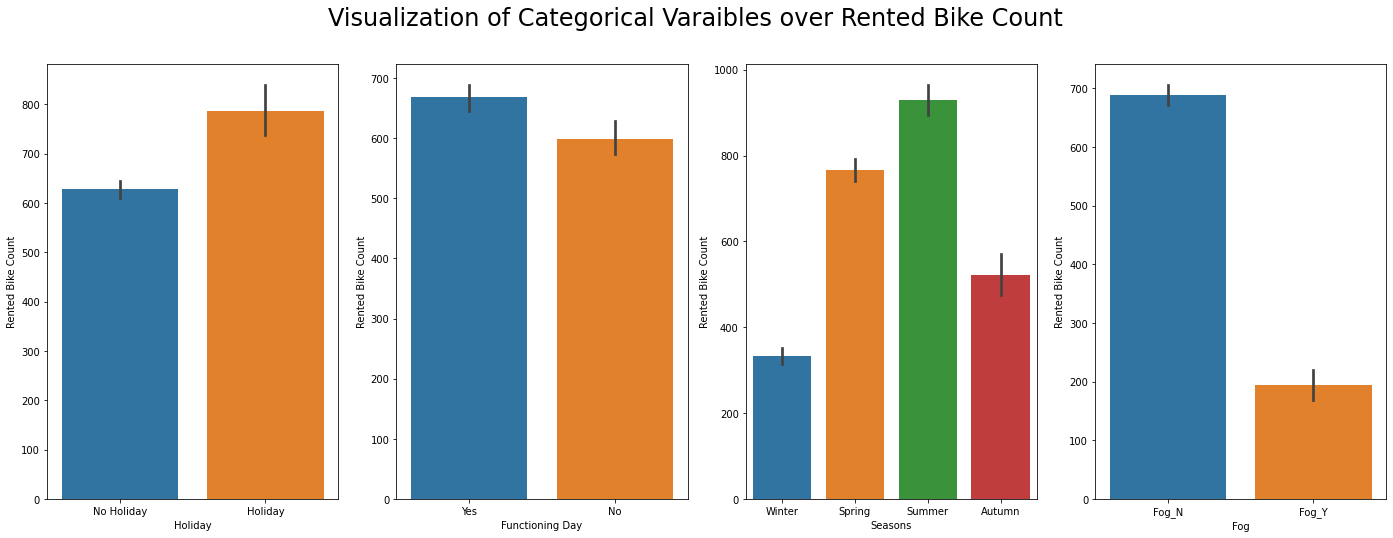

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(24,8))
fig.suptitle('Visualization of Categorical Varaibles over Rented Bike Count', fontsize = 24)

sns.barplot(ax = ax[0], x = 'Holiday', y = 'Rented Bike Count', data = train)
sns.barplot(ax = ax[1], x = 'Functioning Day', y = 'Rented Bike Count', data = train) 
sns.barplot(ax = ax[2], x = 'Seasons', y = 'Rented Bike Count', data = train)
sns.barplot(ax = ax[3], x = 'Fog', y = 'Rented Bike Count', data = train)

- The Demand on Rented Bike Count is high on Holidays as we would expected

- The Demand on Rented Bike Count is high on Functioning days but it is also make sense as the people could rent a bike before or after the work

- The demand on Rented Bike Count increases in Spring and Summer then starts to decreases in autumn and winter

- The Demand increases in the days where are no Fog

# **Apply One Hot Encoder**

In [ ]:
train = one_hot_encoder(train)
test = one_hot_encoder(test)

train

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Solar Radiation (MJ/m2)_lag_3,Solar Radiation (MJ/m2)_lag_-1,Solar Radiation (MJ/m2)_lag_-2,Solar Radiation (MJ/m2)_lag_-3,Spring,Summer,Winter,No Holiday,Yes,Fog_Y
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0,0,1,1,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0,0,1,1,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0,0,1,1,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0,0,1,1,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1898,19,32.9,56,2.6,1944,22.9,0.40,0.0,0.0,...,1.84,0.02,0.0,0.0,0,1,0,1,1,0
5996,1836,20,31.1,64,2.7,1770,23.4,0.02,0.0,0.0,...,1.69,0.00,0.0,0.0,0,1,0,1,1,0
5997,1826,21,30.3,69,2.2,1834,23.9,0.00,0.0,0.0,...,1.00,0.00,0.0,0.0,0,1,0,1,1,0
5998,1664,22,29.8,75,1.4,1609,24.8,0.00,0.0,0.0,...,0.40,0.00,0.0,0.0,0,1,0,1,1,0


# **Describe The Demand of Rented Bikes over Time**

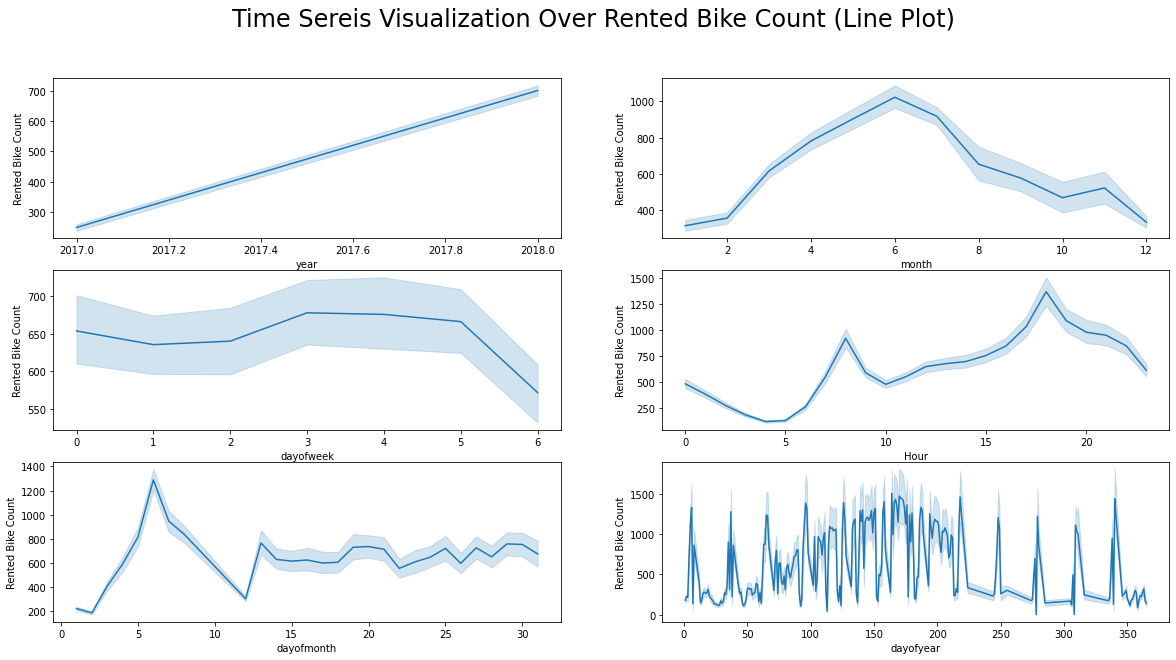

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,10))
fig.suptitle('Time Sereis Visualization Over Rented Bike Count (Line Plot)', fontsize = 24)

sns.lineplot(ax = ax[0,0], x = 'year', y = 'Rented Bike Count', data = train)
sns.lineplot(ax = ax[0,1], x = 'month', y = 'Rented Bike Count', data = train)
sns.lineplot(ax = ax[1,0], x = 'dayofweek', y = 'Rented Bike Count', data = train) 
sns.lineplot(ax = ax[1,1], x = 'Hour', y = 'Rented Bike Count', data = train) 
sns.lineplot(ax = ax[2,0], x = 'dayofmonth', y = 'Rented Bike Count', data = train) 
sns.lineplot(ax = ax[2,1], x = 'dayofyear', y = 'Rented Bike Count', data = train) 

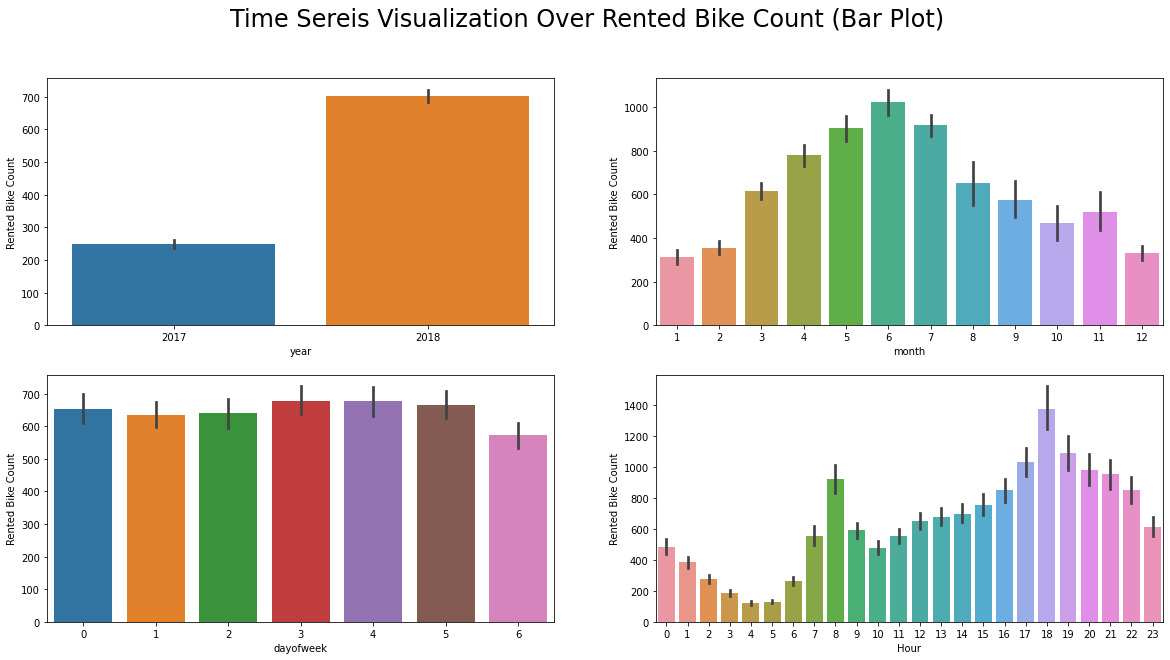

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Time Sereis Visualization Over Rented Bike Count (Bar Plot)', fontsize = 24)

sns.barplot(ax = ax[0,0], x = 'year', y = 'Rented Bike Count', data = train)
sns.barplot(ax = ax[0,1], x = 'month', y = 'Rented Bike Count', data = train)
sns.barplot(ax = ax[1,0], x = 'dayofweek', y = 'Rented Bike Count', data = train) 
sns.barplot(ax = ax[1,1], x = 'Hour', y = 'Rented Bike Count', data = train)

- The demand on renting bike has increased over the years.

- The Demand of the renting bikes is increased from 7-9 AM Before the people going to the work, then increased again from 5-9 PM as people finish there work and return to home.

- The demand on renting bikes starts to increase at the begainnig of week then slightly decreases at the weekend

- The demand on renting bikes over Seasons
  - The demands starts to increase in Summer
  - The demands reach its peek at the begaing of Spring
  - The demands starts to deacrease in Autumn and Winter as th weather is not stable and cold, so it is not suitble for renting a bike

# **View Correlation Matrix After Preprocessing**

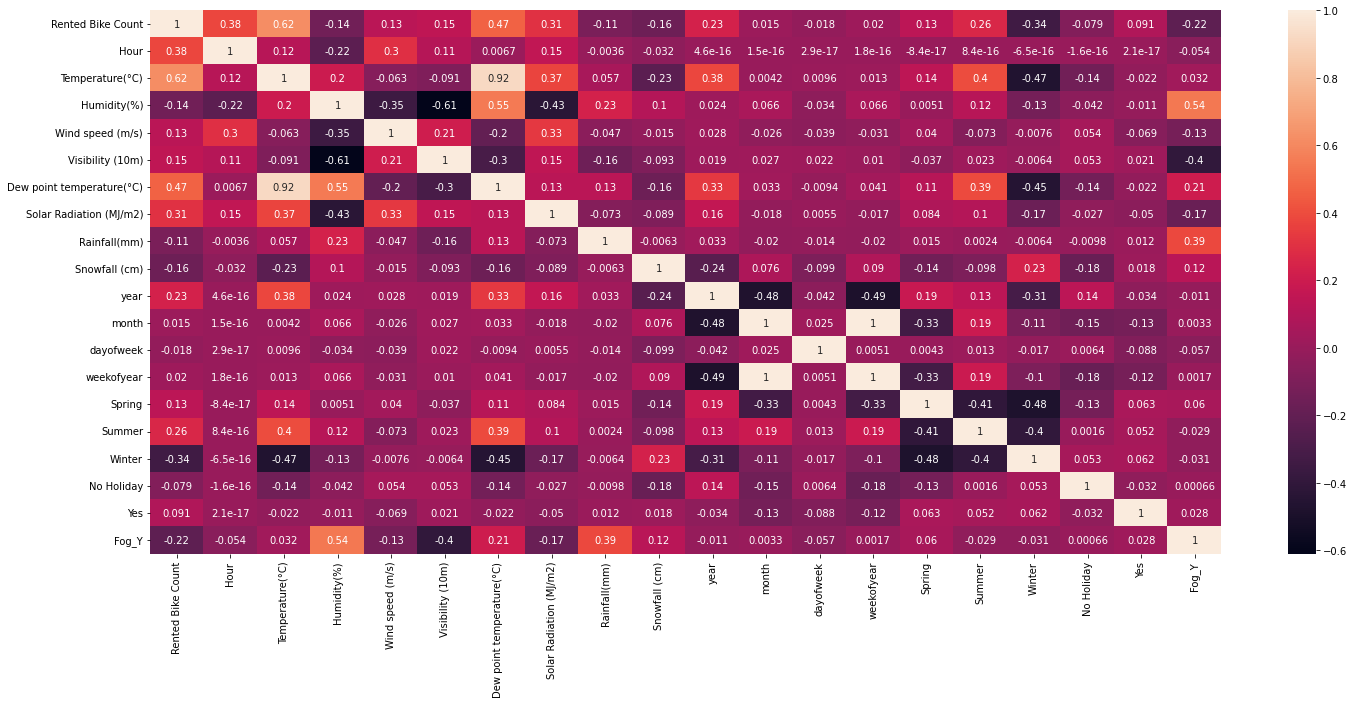

In [ ]:
fig, ax = plt.subplots(figsize=(24,10))
sns.heatmap(data=train.corr(),annot=True, ax = ax)

- If it is a foggy day the demand on renting bike decrease as there is a weak correlation

- The Humidity, Rainfall increases in foggy days while the Visibility decreases so in order of that the demands on rented bike in theses days decreases

# **Remove Multicollinearity**

In [ ]:
train = train.drop(columns = ['Yes'], axis = 1)
test = test.drop(columns = ['Yes'], axis = 1)

# **Polynomial Features**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = train.drop('Rented Bike Count', axis = 1)
y = train['Rented Bike Count']

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly.shape

(6000, 1596)

# **Show Feature Importance**

In [ ]:
reg = RandomForestRegressor()
reg.fit(X,y)

RandomForestRegressor()

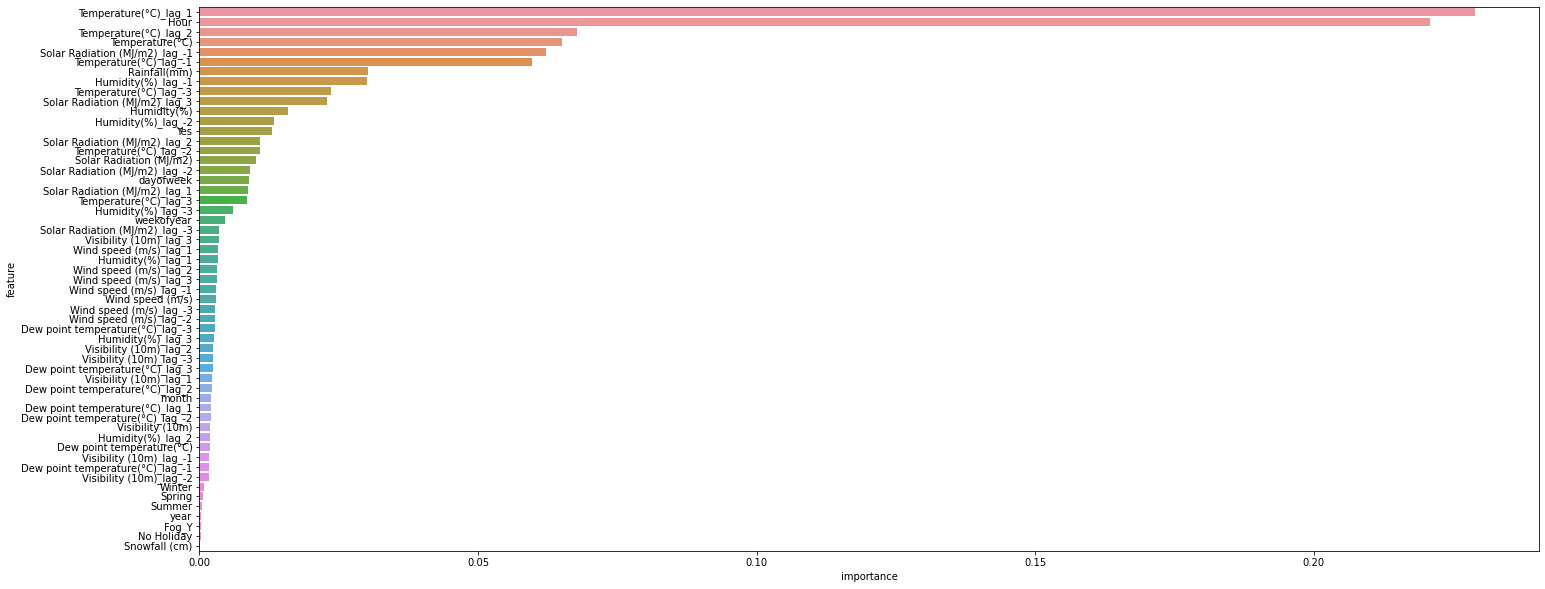

In [ ]:
feature_rank=pd.DataFrame({'feature':X.columns,'importance':reg.feature_importances_})

feature_rank=feature_rank.sort_values('importance',ascending=False)
plt.figure(figsize=(24,10))
sns.barplot(y='feature',x='importance',data=feature_rank)

In [ ]:
best7 = feature_rank['feature'][:10]
temp = X.loc[:, best7]

Index(['Temperature(°C)', 'Hour', 'Solar Radiation (MJ/m2)', 'Humidity(%)',
       'Rainfall(mm)', 'Yes', 'month', 'dayofmonth', 'Wind speed (m/s)',
       'Fog_Y'],
      dtype='object')

# **Another Feature Selection Technique**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest(score_func=f_regression, k=60)

X_selected = fs.fit_transform(X_poly, y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [ ]:
cols = fs.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new

(6000, 60)

# **Feature Selection By Backward Elimintion**

In [ ]:
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

X_opt = X
onesArr = np.ones((X.shape[0],1))
X_opt= np.append(arr = onesArr, values = X_opt, axis = 1)
reg_OLS = backwardElimination(X_opt, 0.05)

# **Feature Scaling/Transormation**

In [ ]:
def FeatureScaling(data):
  power = PowerTransformer(method='yeo-johnson', standardize=True)
  data = power.fit_transform(data)
  return data

In [ ]:
train.iloc[:, 1:] = FeatureScaling(train.iloc[:,1:])

# **Split The training Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Rented Bike Count', axis = 1).values, train['Rented Bike Count'].values, test_size = 0.2, random_state = 0)

# **Apply GridSearch on RandomForest Regressor for Hyperparamter Tuning**

In [ ]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_depth' : [8,12,14,16]
}

cv_gs = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1, cv=5)
cv_gs.fit(X_train, y_train)

In [ ]:
cv_gs.best_params_

{'max_depth': 16, 'n_estimators': 200}

# **Apply Decision Tree Regressor**

In [ ]:
param = {
    "max_depth": [5, 7, 9, 11, 13],
    "min_samples_leaf": [1, 2, 3, 4],
    "ccp_alpha": [0.0, 0.5, 1.5]
}
rgs = RandomizedSearchCV(DecisionTreeRegressor(random_state=0), param, n_jobs=-1, cv=5)
rgs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.5, 1.5],
                                        'max_depth': [5, 7, 9, 11, 13],
                                        'min_samples_leaf': [1, 2, 3, 4]})

In [ ]:
rgs.best_estimator_

DecisionTreeRegressor(max_depth=9, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
RandomizedSearchCV
reg = DecisionTreeRegressor(max_depth=9, random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
y_pred = [int(i) for i in y_pred]
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

279.6735597084573

In [ ]:
reg = RandomForestRegressor(n_estimators = 100, random_state=123)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
y_pred = [int(i) for i in y_pred]
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

211.1095687078158

# **Apply Support Vector Regressor**

In [ ]:
#scaled_X_train, scaled_X_test = FeatureScaling(X_train, X_test)
reg = SVR()
reg.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = reg.predict(X_test)
y_pred = [int(i) for i in y_pred]
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

#720.4043496812573

611.3853060877403

# **Apply Support AdaBoost Regression**

In [ ]:
reg = AdaBoostRegressor(learning_rate = 0.55, random_state=0)
reg.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.55, random_state=0)

In [ ]:
y_pred = reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

#360.1011916122612

359.6021066260931

# **Apply Ridge Regression**

In [ ]:
#X_train, X_test = FeatureScaling(X_train, X_test)
reg = Ridge(alpha=5)
reg.fit(X_train, y_train)

Ridge(alpha=5)

In [ ]:
y_pred = reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

456.81237210603774

# **Apply Linear Regression**

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

456.52866774306443

# **Apply Grid Search on XGBoost For Hyperparamters Tuning**

In [ ]:
"""param = {
    "learning_rate": [0.15, 0.14, 0.16 ,0.2],
    "max_depth": [5, 7, 9, 11, 13]
}
reg = GridSearchCV(XGBRegressor(), param, n_jobs=-1, cv=5)
reg.fit(X_train, y_train)"""

[10:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.15, 0.14, 0.16, 0.2],
                         'max_depth': [5, 7, 9, 11, 13],
                         'min_child_weight': [1, 3, 5, 7]})

In [ ]:
reg.best_estimator_

XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=7)

In [ ]:
reg = XGBRegressor(learning_rate=0.4, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

y_pred[y_pred < 0] = 0
y_pred = [int(i) for i in y_pred]
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

[19:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


209.45999021292826

In [ ]:
reg.score(X_test, y_test)

0.863584476827564

# **Apply Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators=200, max_depth = 5, learning_rate=0.25, min_samples_split = 3)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
y_pred[y_pred < 0] = 0
y_pred = [int(i) for i in y_pred]
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

194.30369270809035

# **Apply CatBoost Regressor**

In [ ]:
"""param = {
    "learning_rate": [0.175, 0.2, 0.25, 0.01, 0.5],
    "max_depth": [1, 3, 7, 5, 9],
    "n_estimators": [100, 200, 300, 400],
    "border_count": [5, 10, 20, 50, 100],
    "l2_leaf_reg": [1, 3, 5, 10, 100],
}
reg = RandomizedSearchCV(CatBoostRegressor(silent=True), param, n_jobs=-1, cv=3)
reg.fit(X_train, y_train)"""

param = {
    "learning_rate": [0.175, 0.1, 0.2, 0.5, 0.05]
}
reg = GridSearchCV(CatBoostRegressor(silent=True), param, n_jobs=-1, cv=3)
reg.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f52d3b25310>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.175, 0.1, 0.2, 0.5, 0.05]})

In [ ]:
reg.best_params_

{'learning_rate': 0.1}

In [ ]:
reg = CatBoostRegressor(learning_rate = 0.175, silent = True) 
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
y_pred[y_pred < 0] = 0
y_pred = [int(i) for i in y_pred]
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

#167.54

169.37742864187464

# **Apply the Regressor Model into Testing Dataset**

In [ ]:
IDs = test['ID']
test_dataset = test.drop('ID', axis = 1)
#y_pred_test =  predict_model(catboost, data = test_dataset)
y_pred_test = reg.predict(test_dataset.values)
y_pred_test[y_pred_test < 0] = 0
y_pred_test = [int(i) for i in y_pred_test]

# **Create CSV File**

In [ ]:
submission = pd.DataFrame(IDs)
submission["Rented Bike Count"] = y_pred_test
submission.to_csv("Submission.csv", index = False)

In [ ]:
submission

,ID,Rented Bike Count
0,0,851
1,1,644
2,2,420
3,3,297
4,4,166
...,...,...
2755,2755,548
2756,2756,496
2757,2757,405
2758,2758,347


In [ ]:
reg

In [ ]:
model1 = pd.read_csv('/content/Submission Model 1.csv')['Rented Bike Count']
model = pd.read_csv('/content/Submission Model 2.csv')['Rented Bike Count']
ref = pd.read_csv('/content/ref.csv')['Rented Bike Count']

ref

0       912
1       685
2       498
3       225
4       117
       ... 
2755    543
2756    442
2757    436
2758    327
2759    305
Name: Rented Bike Count, Length: 2760, dtype: int64

In [ ]:
error = np.sqrt(mean_squared_error(ref, model1))
error

121.856962061667

In [ ]:
error = np.sqrt(mean_squared_error(ref, model))
error

132.72687030684207